In [228]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [229]:
df = pd.read_csv("psy_cleaned.csv")

In [230]:
df.head()

,text
0,adjustment disorder encopresis patient referre...
1,agitation er visit acute episode agitation com...
2,asperger disorder school reports continuing di...
3,attempted suicide consult patient year old cau...
4,bipolar affective disorder consult patient man...


In [231]:
text = df['text']
text_list =  [i.split() for i in text]

In [232]:
indexed_list = list(enumerate(text_list, 1))

In [233]:
indexed_list

[(1,
  ['adjustment',
   'disorder',
   'encopresis',
   'patient',
   'referred',
   'due',
   'concerns',
   'regarding',
   'behavioral',
   'acting',
   'well',
   'encopresis',
   'reason',
   'referral',
   'patient',
   'referred',
   'dr',
   'x',
   'clinic',
   'due',
   'concerns',
   'regarding',
   'behavioral',
   'acting',
   'well',
   'encopresis',
   'minute',
   'initial',
   'intake',
   'completed',
   '03',
   'met',
   'patient',
   'mother',
   'individually',
   'entire',
   'session',
   'reviewed',
   'treatment',
   'consent',
   'form',
   'well',
   'boundaries',
   'confidentiality',
   'stated',
   'understood',
   'concepts',
   'presenting',
   'problems',
   'mother',
   'reported',
   'primary',
   'concern',
   'regard',
   'patient',
   'oppositionality',
   'ambivalent',
   'regarding',
   'addressing',
   'encopresis',
   'regards',
   'oppositionality',
   'reported',
   'onset',
   'oppositionality',
   'approximately',
   'years',
   'age',
  

In [225]:
import multiprocessing
pool = multiprocessing.Pool()

In [236]:
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list], min_count=10)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
# print(text_list)

In [238]:
phrasedf = pd.DataFrame(text_list)

In [239]:
phrasedf

,0,1,2,3,4,5,6,7,8,9,...,3285,3286,3287,3288,3289,3290,3291,3292,3293,3294
0,adjustment,disorder,encopresis,patient,referred,due,concerns,regarding,behavioral,acting,...,None,None,None,None,None,None,None,None,None,None
1,agitation,er,visit,acute,episode,agitation,complaining,felt,might,poisoned,...,None,None,None,None,None,None,None,None,None,None
2,asperger,disorder,school,reports,continuing,difficulties,repetitive,questioning,obsession,cleanness,...,None,None,None,None,None,None,None,None,None,None
3,attempted,suicide,consult,patient,year,old,caucasian,male,attempted,suicide,...,None,None,None,None,None,None,None,None,None,None
4,bipolar,affective,disorder,consult,patient,manic,disorder,presently,psychotic,flight,...,None,None,None,None,None,None,None,None,None,None
5,conversion,disorder,patient,referred,hospitalized,eventually,diagnosed,conversion,disorder,reason,...,None,None,None,None,None,None,None,None,None,None
6,falls,discharge,summary,falls,home,anxiety,depression,patient,increasingly,anxious,...,None,None,None,None,None,None,None,None,None,None
7,huntington,disease,consult,year,old,white,woman,huntington,disease,presents,...,None,None,None,None,None,None,None,None,None,None
8,major,depressive,disorder,ime,consult,patient,presented,significant,muscle,tremor,...,None,None,None,None,None,None,None,None,None,None
9,mental,status,changes,consult,mental,status,changes,fall,sustained,concussion,...,None,None,None,None,None,None,None,None,None,None


In [240]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(5210 unique tokens: ['03', '3', '7', 'academic', 'academy']...)


In [241]:
# build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

# print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]

In [242]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [243]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

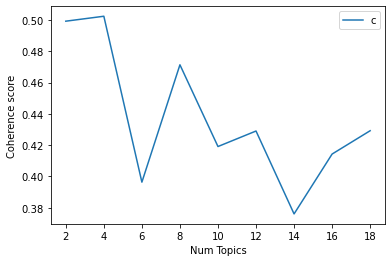

In [244]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [245]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.499218557
Num Topics = 4  has Coherence Value of 0.5023791085
Num Topics = 6  has Coherence Value of 0.3963246157
Num Topics = 8  has Coherence Value of 0.4713425133
Num Topics = 10  has Coherence Value of 0.4190888762
Num Topics = 12  has Coherence Value of 0.4290107674
Num Topics = 14  has Coherence Value of 0.3760119944
Num Topics = 16  has Coherence Value of 0.414289272
Num Topics = 18  has Coherence Value of 0.4291975589


In [246]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4)
pprint(model.print_topics())

[(0,
  '0.001*"mood_lability" + 0.001*"posttraumatic_stress" + '
  '0.001*"bipolar_affective" + 0.001*"mg_p" + 0.001*"hyperactivity_disorder" + '
  '0.001*"huntington_disease" + 0.001*"attention_deficit" + '
  '0.001*"mother_reported" + 0.001*"adderall" + '
  '0.001*"auditory_hallucinations"'),
 (1,
  '0.001*"donor" + 0.001*"mg_p" + 0.001*"transplant" + 0.001*"p_r" + '
  '0.001*"mother_reported" + 0.001*"recipient" + 0.001*"unresponsive" + '
  '0.001*"kidney" + 0.001*"substance_abuse" + 0.001*"high_school"'),
 (2,
  '0.001*"physical_examination" + 0.001*"mg_p" + 0.001*"bipolar_affective" + '
  '0.000*"dizziness" + 0.000*"seclusion" + 0.000*"substance_abuse" + '
  '0.000*"discharge_summary" + 0.000*"migraine" + 0.000*"dr_x" + '
  '0.000*"mother_reported"'),
 (3,
  '0.001*"mg_p" + 0.001*"mr_abc" + 0.001*"neuropsychological_evaluation" + '
  '0.001*"psychiatric_consultation" + 0.001*"mr" + 0.001*"beck" + '
  '0.001*"major_depression" + 0.001*"mental_health" + 0.001*"high_average" + '
  '0

In [247]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"mg_p" + 0.001*"discharge_summary" + 0.001*"beck" + 0.001*"bender" + 0.001*"p" + 0.001*"unresponsive" + 0.000*"p_r" + 0.000*"gestalt" + 0.000*"bipolar_disorder" + 0.000*"seroquel_mg"
Topic: 1 Word: 0.001*"mood_lability" + 0.001*"bipolar_affective" + 0.001*"posttraumatic_stress" + 0.001*"mental_health" + 0.001*"auditory_hallucinations" + 0.001*"donor" + 0.001*"emergency_room" + 0.001*"neuropsychological_evaluation" + 0.001*"attention_deficit" + 0.001*"mr_abc"
Topic: 2 Word: 0.001*"mother_reported" + 0.001*"mr" + 0.000*"reported" + 0.000*"mr_abc" + 0.000*"kidney" + 0.000*"donor" + 0.000*"back_pain" + 0.000*"transplant" + 0.000*"recipient" + 0.000*"mg_p"
Topic: 3 Word: 0.001*"mg_p" + 0.001*"substance_abuse" + 0.001*"psychiatric_consultation" + 0.001*"p_r" + 0.001*"huntington_disease" + 0.001*"mother_reported" + 0.001*"physical_examination" + 0.001*"5_mg" + 0.001*"p" + 0.001*"major_depression"
